## Trees and Forests Demo

In [1]:
import pandas as pd
import numpy as np
import altair as alt
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
from sklearn.tree import export_graphviz
import graphviz
import warnings

warnings.filterwarnings('ignore')

### Decision Trees

In [2]:
#function for plotting a decision tree
#input is feature data, class predictions, and the trained model.
def plot_tree(X, y, model, predict_proba = False):
    # Join data for plotting
    sample = (X.join(y))
    # Create a mesh for plotting
    step = (X.max() - X.min()) / 50
    x1, x2 = np.meshgrid(np.arange(sample.min()[0]-step[0], sample.max()[0]+step[0], step[0]),
                         np.arange(sample.min()[1]-step[1], sample.max()[1]+step[1], step[1]))

    # Store mesh in dataframe
    mesh_df = pd.DataFrame(np.c_[x1.ravel(), x2.ravel()], columns=['x1', 'x2'])

    # Mesh predictions
    if predict_proba:
        mesh_df['predictions'] = model.predict_proba(mesh_df[['x1', 'x2']])[:, 0]
        # Plot
        base_plot = alt.Chart(mesh_df).mark_rect(opacity=0.5).encode(
            x=alt.X('x1', bin=alt.Bin(step=step[0])),
            y=alt.Y('x2', bin=alt.Bin(step=step[1])),
            color=alt.Color('predictions', title='P(blue)', scale=alt.Scale(scheme='redblue'))
        ).properties(
            width=400,
            height=400
        )
        return alt.layer(base_plot).configure_axis(
            labelFontSize=20,
            titleFontSize=20
        ).configure_legend(
            titleFontSize=20,
            labelFontSize=20
        )
    else:
        mesh_df['predictions'] = model.predict(mesh_df[['x1', 'x2']])
        # Plot
        scat_plot = alt.Chart(sample).mark_circle(
            stroke='black',
            opacity=0.5,
            strokeWidth=1.5,
            size=100
        ).encode(
            x=alt.X(X.columns[0], axis=alt.Axis(labels=True, ticks=True, title=X.columns[0])),
            y=alt.Y(X.columns[1], axis=alt.Axis(labels=True, ticks=True, title=X.columns[1])),
            color=alt.Color(y.columns[0])
        )
        base_plot = alt.Chart(mesh_df).mark_rect(opacity=0.5).encode(
            x=alt.X('x1', bin=alt.Bin(step=step[0])),
            y=alt.Y('x2', bin=alt.Bin(step=step[1])),
            color=alt.Color('predictions', title='Legend')
        ).properties(
            width=400,
            height=400
        )
        return alt.layer(base_plot, scat_plot).configure_axis(
            labelFontSize=20,
            titleFontSize=20
        ).configure_legend(
            titleFontSize=20,
            labelFontSize=20
        )

### Let's see how decision trees work
1. Load our data
1. Training / testing split
1. Fit a **classification tree**

In [3]:
#load data
cities_df = pd.read_csv('cities_USA.csv', index_col=0)
cities_df.head()

,lon,lat,vote
1,-80.162475,25.692104,blue
2,-80.214360,25.944083,blue
3,-80.094133,26.234314,blue
4,-80.248086,26.291902,blue
5,-81.789963,26.348035,blue


In [4]:
cities_df['vote'].value_counts()

vote
blue    234
red     166
Name: count, dtype: int64

In [5]:
cities_df.shape

(400, 3)

In [6]:
# split data into training and testing sets
X = cities_df.drop(columns=['vote'])
X.columns = ['x1', 'x2']
y = cities_df[['vote']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=93)

In [7]:
# train a decision tree classifier
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=3, min_samples_leaf=10)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=10)

### What did the classification tree do?
- Found a good way to split and repeat

In [8]:
plot_tree(X, y, model)

alt.LayerChart(...)

$
\text{Gini impurity} = 1 - (p_1^2 + p_2^2)
$

In [12]:
y_train.value_counts()

vote
blue    191
red     129
Name: count, dtype: int64

In [10]:
y_test.value_counts().sum()

80

In [13]:
total_labels = 320

gi = 1 - ((191 / total_labels)**2 + (129 / total_labels)**2)
gi

0.48123046875

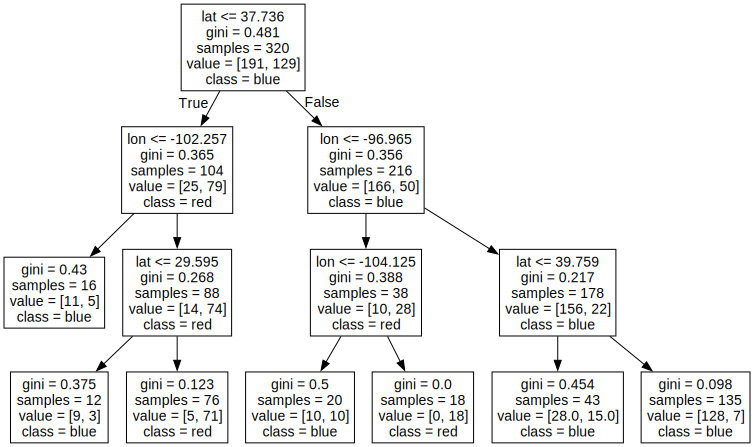

In [11]:
#view the entire tree
graphviz.Source(export_graphviz(model,
                                out_file=None,
                                feature_names=['lon', 'lat'],
                                class_names=['blue', 'red'],
                                impurity=True))

In [14]:
model.score(X_train, y_train)

0.859375

In [15]:
model.score(X_test, y_test)

0.8375

In [16]:
from sklearn.metrics import classification_report

print('Train data results')
print(classification_report(y_train, model.predict(X_train)))

print('Test data results')
print(classification_report(y_test, model.predict(X_test)))

Train data results
              precision    recall  f1-score   support

        blue       0.82      0.97      0.89       191
         red       0.95      0.69      0.80       129

    accuracy                           0.86       320
   macro avg       0.88      0.83      0.85       320
weighted avg       0.87      0.86      0.85       320

Test data results
              precision    recall  f1-score   support

        blue       0.79      0.95      0.86        43
         red       0.93      0.70      0.80        37

    accuracy                           0.84        80
   macro avg       0.86      0.83      0.83        80
weighted avg       0.85      0.84      0.83        80



### Regression Trees

In [17]:
from sklearn.datasets import fetch_california_housing

In [18]:
california = fetch_california_housing()

In [20]:
X = california['data']
y = california['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=93)

In [21]:
#train decision tree regressor
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(max_depth=10, min_samples_leaf=100)
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, min_samples_leaf=100)

In [22]:
california['feature_names']

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

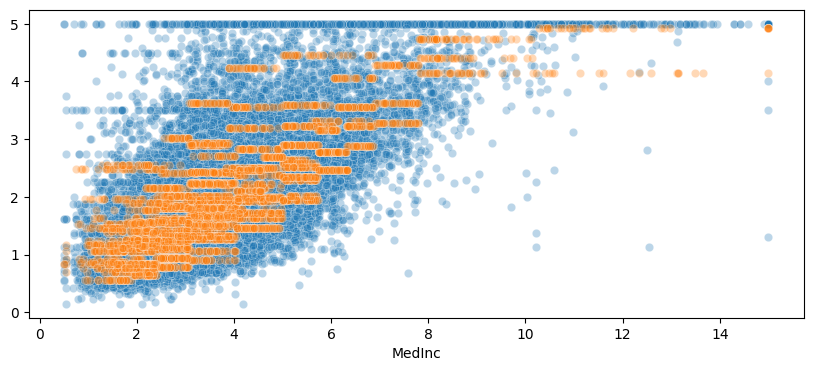

In [23]:
fig, ax = plt.subplots(figsize=(10, 4))

column_id = 0

sns.scatterplot(x=X[:,column_id], y=y, alpha=0.3)
sns.scatterplot(x=X_test[:,column_id], y=model.predict(X_test), alpha=0.3)
ax.set_xlabel(california['feature_names'][column_id])
plt.show()

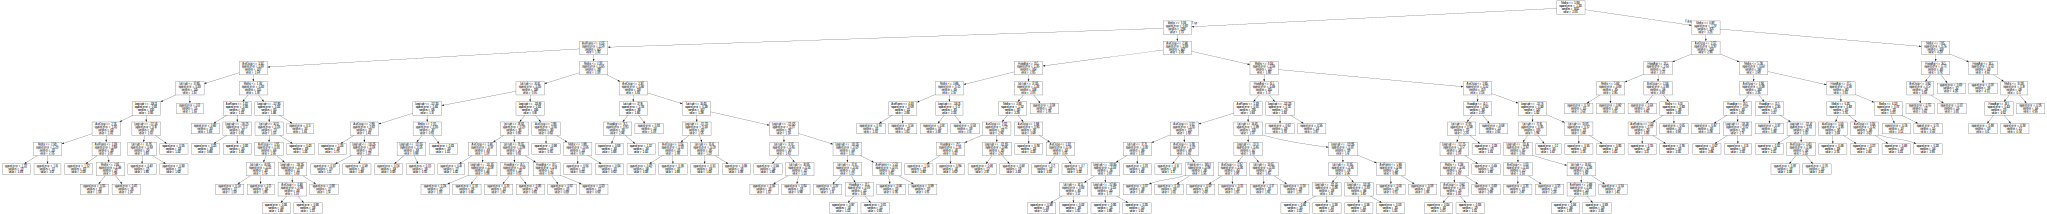

In [24]:
#view decision tree
graphviz.Source(export_graphviz(model,
                                out_file=None,
                                feature_names=california['feature_names']))

In [25]:
model.score(X_train, y_train)

0.7127124728380057

In [26]:
model.score(X_test, y_test)

0.695388107491288

In [27]:
# just to compare with Linear Regression

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

print(f'Train: {lr.score(X_train, y_train)}')
print(f'Test: {lr.score(X_test, y_test)}')

Train: 0.6045093621462014
Test: 0.6099377283475397


In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
#Plots training error and testing error, using various amounts of trees in the random forest.
def make_num_tree_plot(X_train, y_train, X_test, y_test, num_trees):
    """
    Make number of trees vs error rate plot for RandomForestClassifier

    Parameters
    ----------
    X_train: numpy.ndarray
        The X part of the train set
    y_train: numpy.ndarray
        The y part of the train set
    X_test: numpy.ndarray
        The X part of the test/validation set
    y_test: numpy.ndarray
        The y part of the test/validation set
    num_trees: int
        The value for `n_estimators` argument of RandomForestClassifier
    Returns
    -------
        None
        Shows the number of trees vs error rate plot

    """
    train_err = []
    test_err = []
	
    for ntree in num_trees:
        model = RandomForestClassifier(n_estimators=ntree, max_depth=3, random_state=93)
        model.fit(X_train, y_train)
        train_err.append(1-model.score(X_train, y_train))
        test_err.append(1-model.score(X_test, y_test))

    fig, ax = plt.subplots()
    ax.plot(num_trees,train_err,label="train")
    ax.plot(num_trees,test_err,label="test")
    ax.set_xlabel('number of trees');
    ax.set_ylabel('error rate');
    ax.set_xscale('log')
    ax.legend()
    plt.show()

In [30]:
# split data into training and testing sets
X = cities_df.drop(columns=['vote'])
X.columns = ['x1', 'x2']
y = cities_df[['vote']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=93)

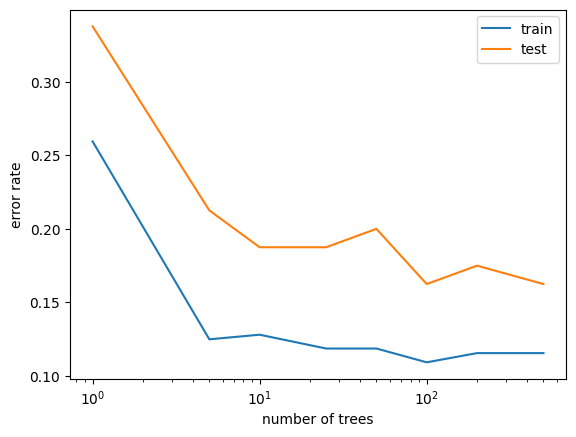

In [31]:
#fit a random forest for various n_estimators and plot the error
make_num_tree_plot(X_train, y_train, X_test, y_test, (1, 5, 10, 25, 50, 100, 200, 500))

In [32]:
model = RandomForestClassifier(n_estimators=30, max_depth=3)

model.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, n_estimators=30)

In [33]:
plot_tree(X, y, model)

alt.LayerChart(...)

In [34]:
model.score(X_train, y_train)

0.878125

In [35]:
model.score(X_test, y_test)

0.825

In [36]:
model.estimators_[0]

DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                       random_state=2115517290)

In [40]:
plot_tree(X, y, model.estimators_[0])

alt.LayerChart(...)

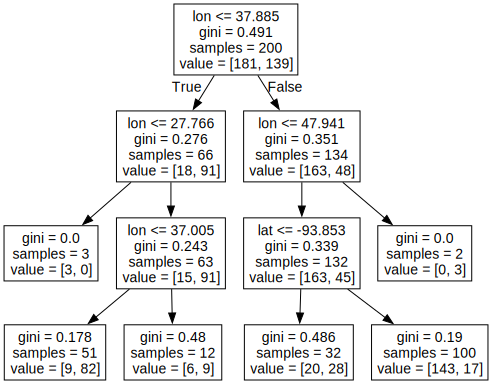

In [41]:
#view decision tree
graphviz.Source(export_graphviz(model.estimators_[0],
                                out_file=None,
                                feature_names=['lat', 'lon']))

## Ensembles
### Boosting Example

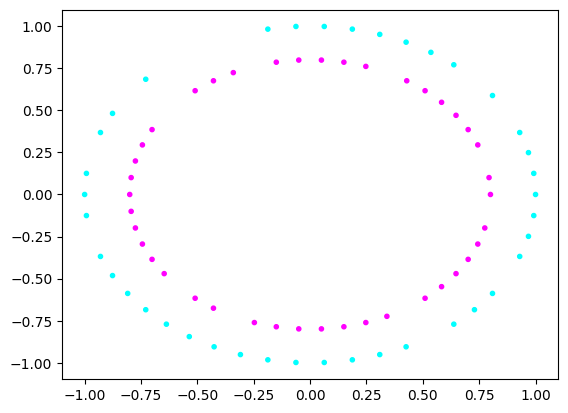

In [42]:
# Let's generate some fake data

# generate blobs with fixed random generator
n = 100
n_classes = 2
X, y = make_circles(n_samples=n, random_state = 122)

X_train_circ, X_test_circ, y_train_circ, y_test_circ = train_test_split(X, y, test_size=0.2)

# How does the data look like?
fig, ax = plt.subplots()
ax.scatter(*X_train_circ.T, c=y_train_circ, marker='.', cmap='cool');

In [43]:
from sklearn.ensemble import AdaBoostClassifier

In [44]:
#create the adaboost classifier and fit it
ensemble = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2), n_estimators=3)
ensemble.fit(X_train_circ, y_train_circ)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2),
                   n_estimators=3)

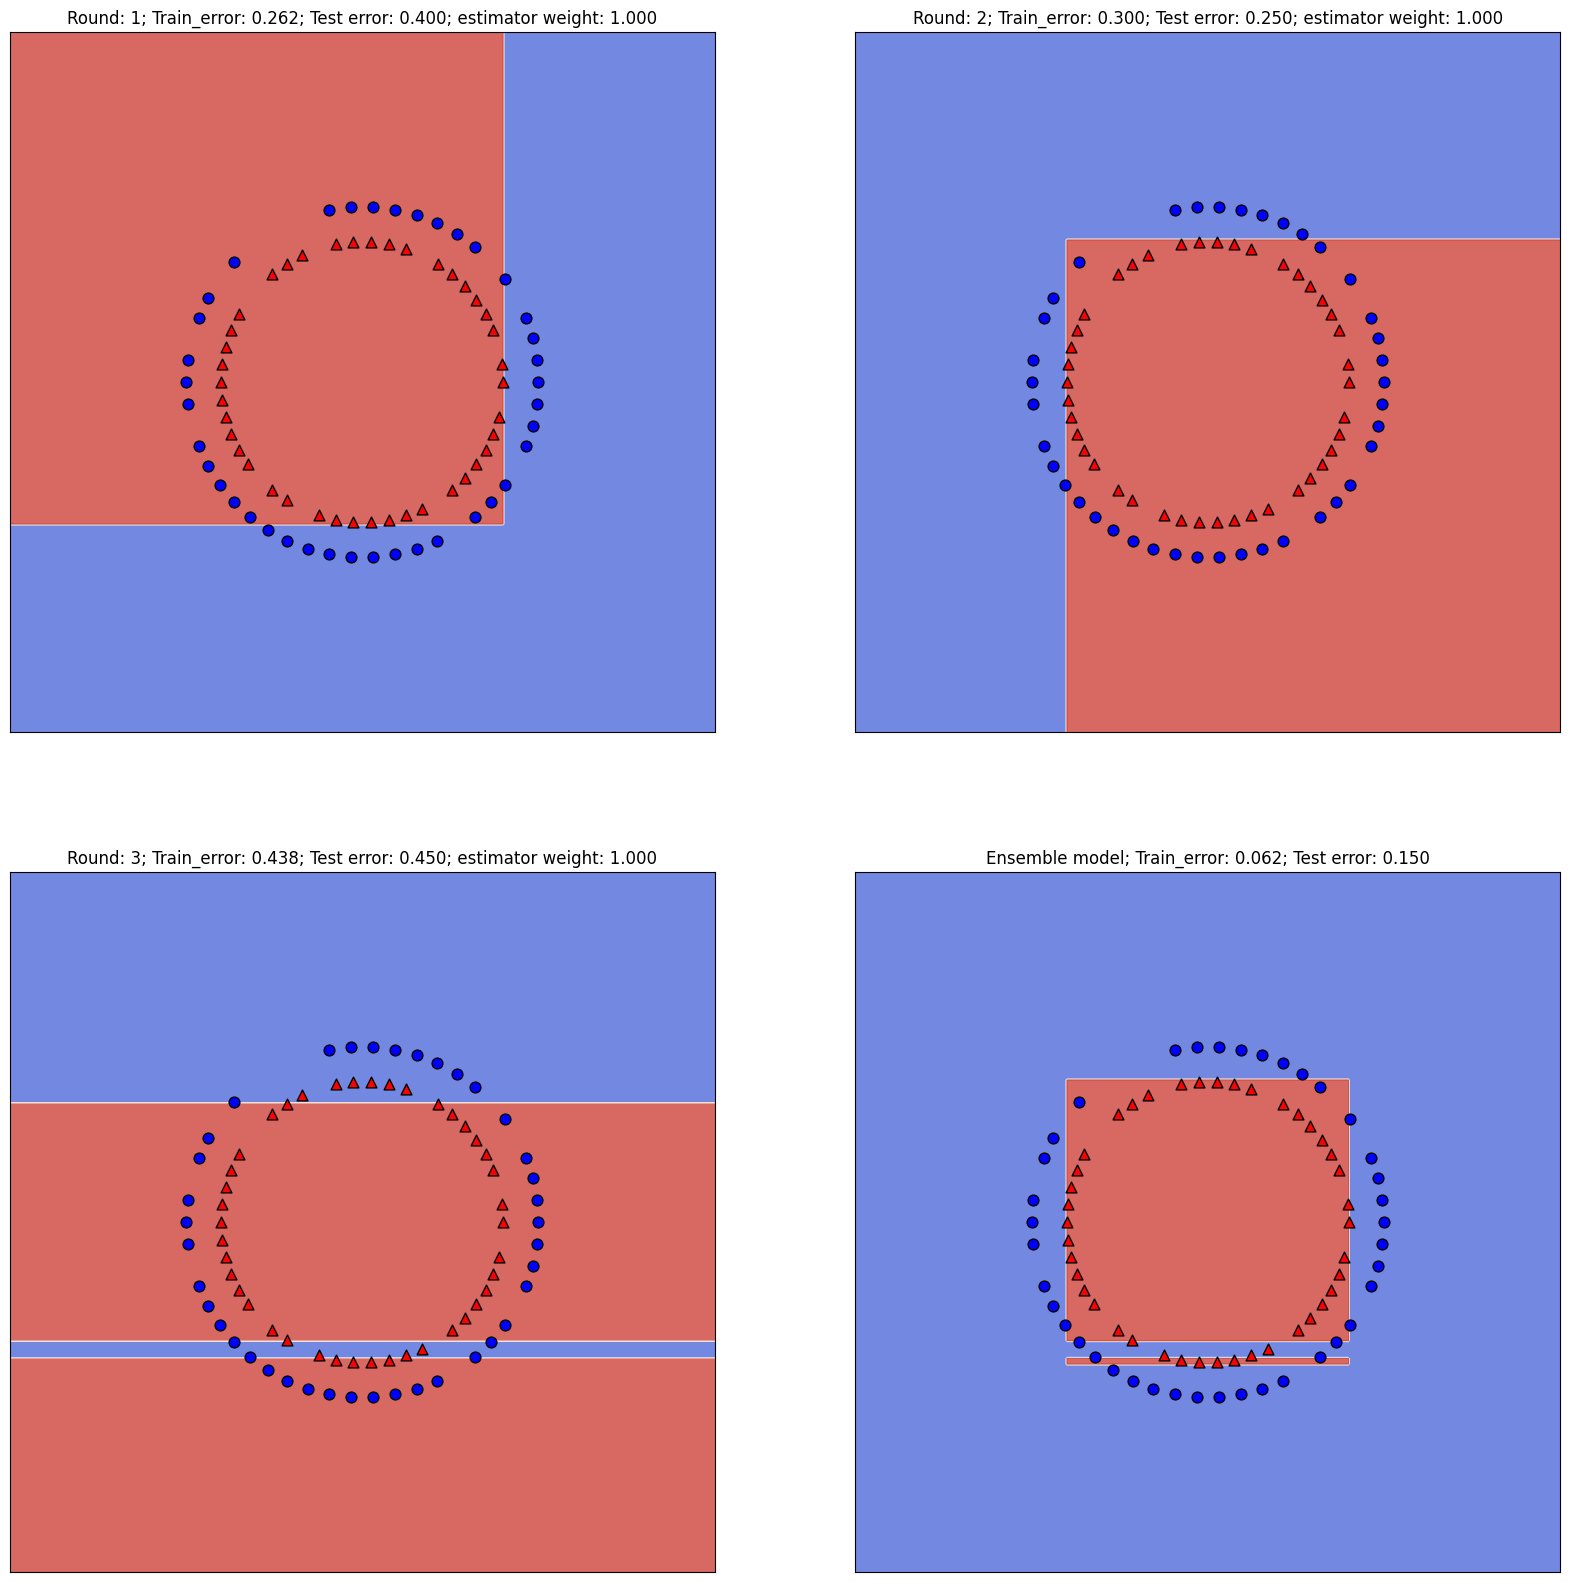

In [ ]:
#located in plotclassifier.py (contains plot_classifier function)
from plot_classifier import *

# Combine weak learners
fig, axs = plt.subplots(2, 2, figsize=(20,20))
weights = ensemble.estimator_weights_
for i, estimator in enumerate(ensemble.estimators_):
    ax = axs[i//2, i % 2]
    plot_classifier(X_train_circ, y_train_circ, estimator, ax=ax)
    tr_err = (1 - estimator.score(X_train_circ, y_train_circ))
    te_err = (1 - estimator.score(X_test_circ, y_test_circ))
    title = f'Round: {i + 1}; Train_error: {tr_err:0.3f}; Test error: {te_err:0.3f}; estimator weight: {weights[i]:0.3f}'
    ax.set_title(title);

ax = axs[1, 1]
plot_classifier(X_train_circ, y_train_circ, ensemble, ax=plt.gca())
tr_err = (1 - ensemble.score(X_train_circ, y_train_circ))
te_err = (1 - ensemble.score(X_test_circ, y_test_circ))
title = f'Ensemble model; Train_error: {tr_err:0.3f}; Test error: {te_err:0.3f}'
ax.set_title(title)

plt.show()

Using Cities data with GridSearchCV

In [46]:
# split data into training and testing sets
X = cities_df.drop(columns=['vote'])
X.columns = ['x1', 'x2']
y = cities_df[['vote']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=93)

In [47]:
from sklearn.model_selection import GridSearchCV

In [48]:
abc = AdaBoostClassifier(estimator=DecisionTreeClassifier())

param_grid = {'learning_rate' : [0.25, 0.50, 0.75, 1.00],
              'n_estimators' : [1, 3, 5, 10, 15, 20, 30],
              'estimator__max_depth': [1, 2, 3]}

grid = GridSearchCV(abc, param_grid, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(estimator=DecisionTreeClassifier()),
             param_grid={'estimator__max_depth': [1, 2, 3],
                         'learning_rate': [0.25, 0.5, 0.75, 1.0],
                         'n_estimators': [1, 3, 5, 10, 15, 20, 30]})

In [49]:
grid.score(X_train, y_train)

1.0

In [50]:
grid.score(X_test, y_test)

0.8875

In [51]:
grid.best_params_

{'estimator__max_depth': 3, 'learning_rate': 0.75, 'n_estimators': 30}

In [54]:
y_series = y.apply(lambda x: x=='blue')

In [55]:
plot_tree(X, y_series, grid.best_estimator_)

alt.LayerChart(...)

### Stacking example

In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier  #meta model

In [58]:
X = cities_df[['lon', 'lat']].values
y = pd.get_dummies(cities_df['vote'], drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2, random_state=93)

In [60]:
# Create a simple voting classifier using scikit-learn's VotingClassifier

classifiers = {
    'Decision tree'         : DecisionTreeClassifier(),
    'KNN'                   : KNeighborsClassifier(),
    'Naive Bayes'           : GaussianNB(),
    'Logistic Regression'   : LogisticRegression(),
}

# voting="soft" predicts the class label based on the argmax of the sums of the predicted probabilities
ensemble = VotingClassifier(list(classifiers.items()), voting='soft')

# note: sklearn doesn't seem to support passing pre-trained classifiers into VotingClassifier
ensemble.fit(X_train, np.ravel(y_train))

print('Ensemble performance: \n')
print('Training accuracy:   %.3f' % (ensemble.score(X_train, y_train)))
print('Validation accuracy: %.3f' % (ensemble.score(X_test, y_test)))

Ensemble performance: 

Training accuracy:   0.887
Validation accuracy: 0.806


In [61]:
## What's the performance of individual classifiers in the ensemble?
for name, estimator in ensemble.named_estimators_.items():
    tr_acc = (estimator.score(X_train, y_train))
    te_acc = (estimator.score(X_test, y_test))
    print('%s: Train accuracy: %0.3f; Test accuracy: %0.3f'%(name, tr_acc, te_acc))

Decision tree: Train accuracy: 1.000; Test accuracy: 0.853
KNN: Train accuracy: 0.863; Test accuracy: 0.825
Naive Bayes: Train accuracy: 0.725; Test accuracy: 0.653
Logistic Regression: Train accuracy: 0.775; Test accuracy: 0.697


Text(0.5, 1.0, 'Ensemble; Train accuracy: 0.887; Test accuracy: 0.806')

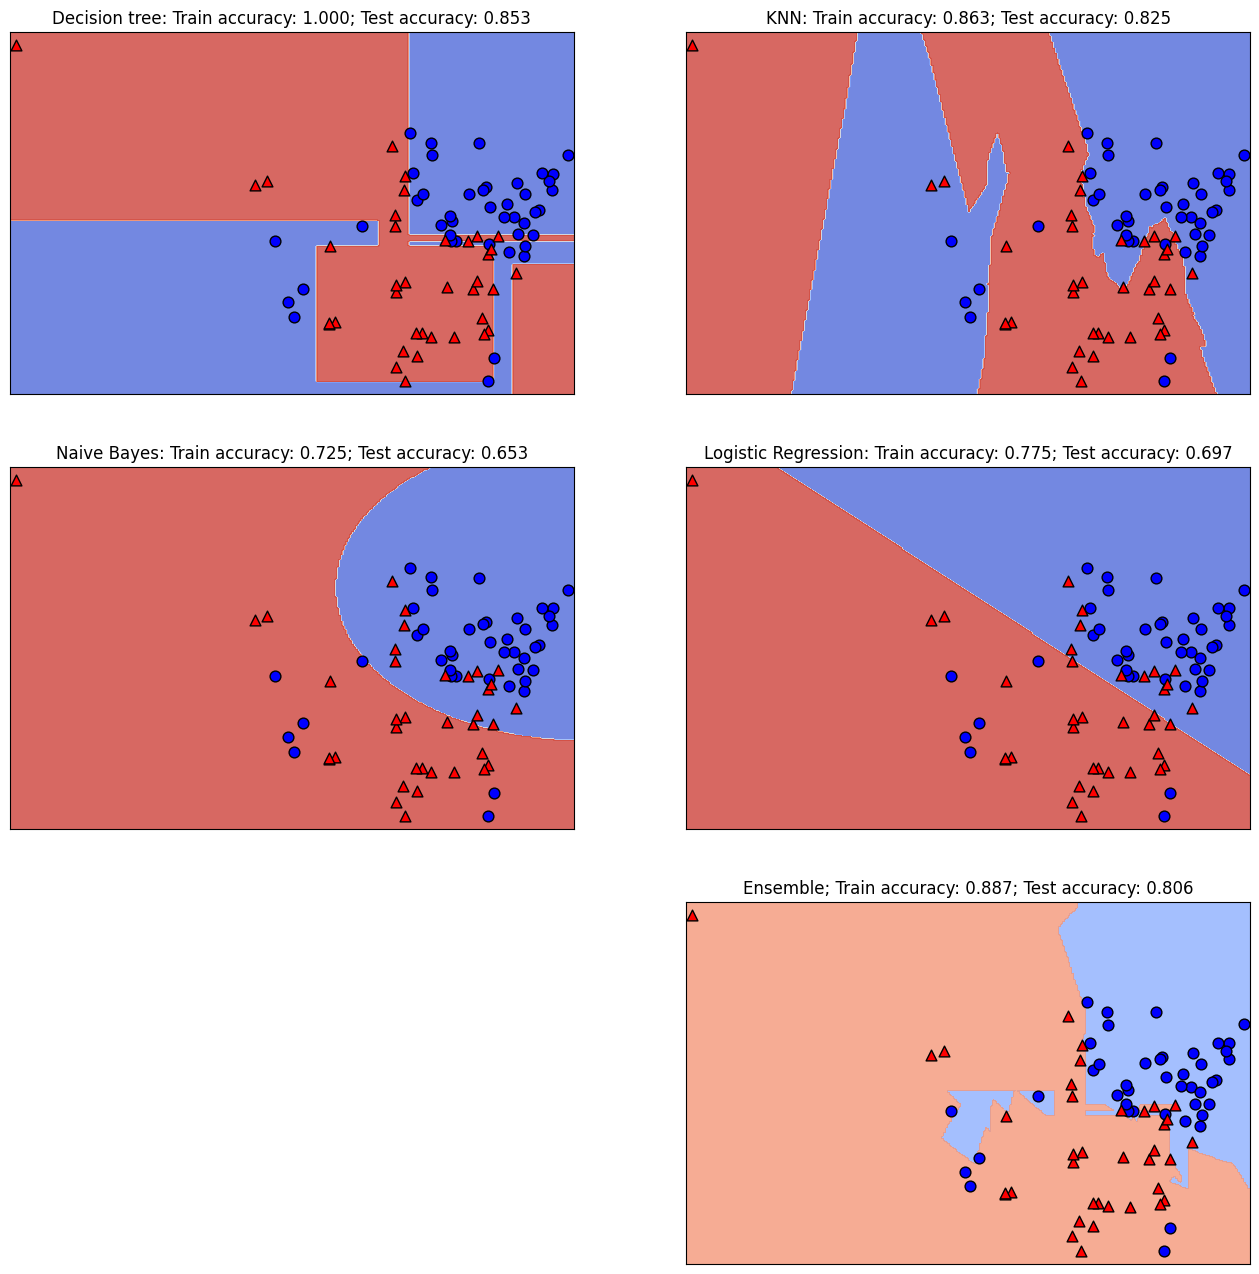

In [62]:
plt.figure(figsize=(16,16))
count = 1
for name, estimator in ensemble.named_estimators_.items(): # needs scikit-learn-0.20
    plt.subplot(3,2,count)
    plot_classifier(X_train, y_train, estimator, ax=plt.gca())
    tr_acc = (estimator.score(X_train, y_train))
    te_acc = (estimator.score(X_test, y_test))
    title = '%s: Train accuracy: %0.3f; Test accuracy: %0.3f'%(name, tr_acc, te_acc)
    plt.title(title)
    count += 1

plt.subplot(3,2,6)
plot_classifier(X_train, y_train, ensemble, ax=plt.gca())
tr_acc = ensemble.score(X_train, y_train)
te_acc = ensemble.score(X_test, y_test)
title = '%s; Train accuracy: %0.3f; Test accuracy: %0.3f'%('Ensemble', tr_acc, te_acc)
plt.title(title)